# Defining and using short-range wakefields 

In [1]:
import RF_Track as RFT
import numpy as np
import matplotlib.pyplot as plt

## Define a short-range wakefield

RF-Track implements several wakefield models. One of the most useful is provided by ```ShortRanngeWakefield```, which implements K. Bane's approximation, described in [SLAC-PUB-9663, 2003]

It models the wakefields are defined using the key structure's geometric parameters:
* $a$, the iris aperture radius in m
* $g$, the gap length in m
* $l$, the cell length in m

In [2]:
a = 0.002 # m, iris aperture radius
g = 0.005 # m, gap length
l = 0.006 # m, cell length

SRWF = RFT.ShortRangeWakefield(a, g, l) # a,g,l

We can plot the wake function

In [3]:
Z = np.linspace(0, -0.001, 1001);

Wt = []
Wl = []

for z in Z:
    Wt.append(SRWF.w_transv(z)) # V/pC/m/mm
    Wl.append(SRWF.w_long(z)) # V/pC/m   

Text(0, 0.5, '$W_l$ [V/pC/m]')

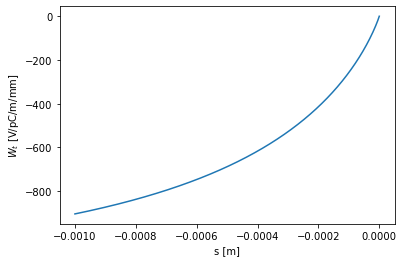

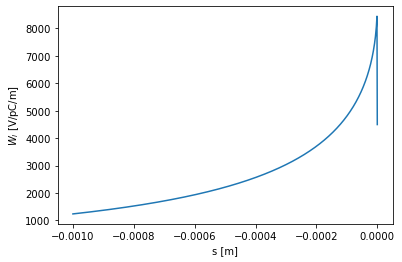

In [4]:
plt.figure()
plt.plot(Z, Wt)
plt.xlabel('s [m]')
plt.ylabel(r'$W_t$ [V/pC/m/mm]')

plt.figure()
plt.plot(Z, Wl)
plt.xlabel('s [m]')
plt.ylabel(r'$W_l$ [V/pC/m]')

### Once defined, we can attach it to an element
As an example, let's attach it to a 1m-long drift

In [5]:
D = RFT.Drift(1);

D.add_collective_effect(SRWF)
D.set_cfx_nsteps(10) # we want to have 10 kicks along the structure

### Now let's create a bunch
Purely longitudinal

In [6]:
sigma_t = 0.1 # mm/c
Pspread = 0.001 # permille, momentum spread
Pref = 50 # MeV/c

Twiss = RFT.Bunch6d_twiss()
Twiss.sigma_t = sigma_t # mm/c
Twiss.sigma_pt = Pspread # permille

B0 = RFT.Bunch6d(RFT.electronmass, RFT.nC, -1, Pref, Twiss, 1000)

Text(0, 0.5, 'P [MeV/c]')

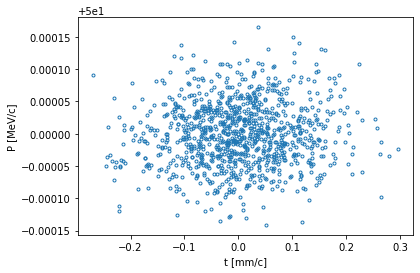

In [7]:
M0 = B0.get_phase_space()

plt.plot(M0[:,4], M0[:,5], '.', mfc='none')
plt.xlabel('t [mm/c]')
plt.ylabel('P [MeV/c]')

### and a Lattice

In [8]:
# lattice
L = RFT.Lattice()
L.append(D)

Let's plot the outcoming bunch, for different incoming offsets

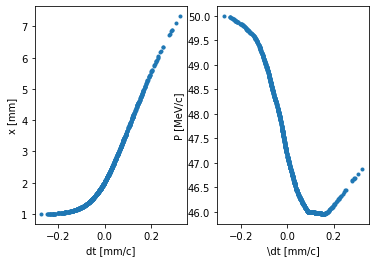

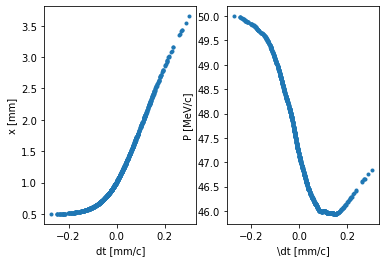

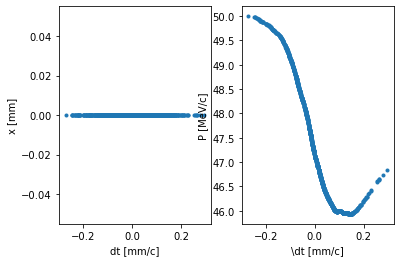

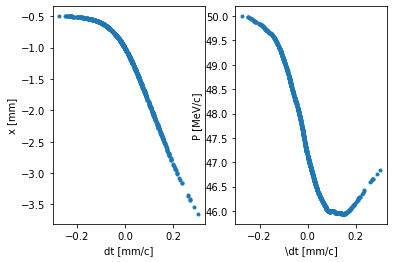

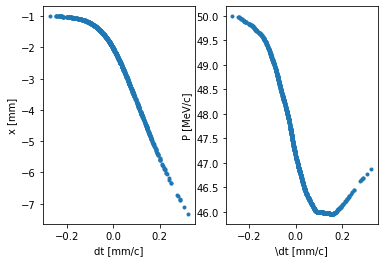

In [9]:
# main loop
for X in np.linspace(+1, -1, 5):

    M0[:,0] = X
    B0.set_phase_space(M0)
    
    # track
    B1 = L.track(B0)
    
    # do plots
    M1 = B1.get_phase_space('%x %xp %y %yp %dt %P')

    plt.figure()
    plt.subplot(1,2,1)
    plt.plot(M1[:,4], M1[:,0], '.')
    plt.xlabel('dt [mm/c]')
    plt.ylabel('x [mm]')

    plt.subplot(1,2,2)
    plt.plot(M1[:,4], M1[:,5], '.')
    plt.xlabel('\dt [mm/c]')
    plt.ylabel('P [MeV/c]')